This dataset describes 5-star rating and free-text tagging activity from [MovieLens](http://movielens.org), a movie recommendation service. It contains 100836 ratings and 3683 tag applications across 9742 movies. These data were created by 610 users between March 29, 1996 and September 24, 2018. This dataset was generated on September 26, 2018.

Users were selected at random for inclusion. All selected users had rated at least 20 movies. No demographic information is included. Each user is represented by an id, and no other information is provided.

The data are contained in the files 'links.csv', 'movies.csv', 'ratings.csv' and 'tags.csv'. More details about the contents and use of all these files follows:

- User Ids: Unique and anonymized.
- Movies Ids: Only movies with at least one rating. 

In [435]:
pip install surprise

  Using cached surprise-0.1-py2.py3-none-any.whl (1.8 kB)
Note: you may need to restart the kernel to use updated packages.


In [436]:
pip install wordcloud

Note: you may need to restart the kernel to use updated packages.


In [437]:
# Let's include general porpuses libraries 

import pandas as pd
import numpy as np                     # For mathematical calculations
import seaborn as sns                  # For data visualization
import matplotlib.pyplot as plt        # For plotting graphs
from datetime import datetime
from datetime import timedelta
from wordcloud import WordCloud

%matplotlib inline

Let's check one by one all the data we have 

In [438]:
dfratings = pd.read_csv('ratings.csv')
dfratings.head()

,userId,movieId,rating,timestamp
0,1,1,4.0,964982703
1,1,3,4.0,964981247
2,1,6,4.0,964982224
3,1,47,5.0,964983815
4,1,50,5.0,964982931


Ratings are made in a 5-star scale, with half-star increments
Timestamp data is the time when the movie was rated (Timestamps represent seconds since midnight Coordinated Universal Time (UTC) of January 1, 1970)

In [439]:
dfratings.isnull().sum()

userId       0
movieId      0
rating       0
timestamp    0
dtype: int64

In [440]:
dfratings.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100836 entries, 0 to 100835
Data columns (total 4 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   userId     100836 non-null  int64  
 1   movieId    100836 non-null  int64  
 2   rating     100836 non-null  float64
 3   timestamp  100836 non-null  int64  
dtypes: float64(1), int64(3)
memory usage: 3.1 MB


Let's translate the timestamp in a datetime type in python

In [441]:
dfratings['timestamp'].values

array([ 964982703,  964981247,  964982224, ..., 1494273047, 1493846352,
       1493846415], dtype=int64)

In [442]:
dates = []

for ts in dfratings['timestamp'].values:
    dates.append((datetime.fromtimestamp((ts))))
    
dfratings['dates'] = dates

In [443]:
dfratings=dfratings.drop('timestamp', axis=1)
dfratings.head()

,userId,movieId,rating,dates
0,1,1,4.0,2000-07-30 20:45:03
1,1,3,4.0,2000-07-30 20:20:47
2,1,6,4.0,2000-07-30 20:37:04
3,1,47,5.0,2000-07-30 21:03:35
4,1,50,5.0,2000-07-30 20:48:51


In [444]:
dfratings.userId.value_counts().sort_values()

442      20
320      20
207      20
576      20
194      20
       ... 
274    1346
448    1864
474    2108
599    2478
414    2698
Name: userId, Length: 610, dtype: int64

Client 474 

In [445]:
dftags = pd.read_csv('tags.csv')
dftags.head()

,userId,movieId,tag,timestamp
0,2,60756,funny,1445714994
1,2,60756,Highly quotable,1445714996
2,2,60756,will ferrell,1445714992
3,2,89774,Boxing story,1445715207
4,2,89774,MMA,1445715200


This table has free-text taggind done by users. Also claissified by userId and movieId. The meaning, value, and purpose of a particular tag is determined by each user.

In [446]:
dftags = dftags.drop('timestamp', axis=1)

In [447]:
dftags.isnull().sum()

userId     0
movieId    0
tag        0
dtype: int64

In [448]:
dftags.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3683 entries, 0 to 3682
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   userId   3683 non-null   int64 
 1   movieId  3683 non-null   int64 
 2   tag      3683 non-null   object
dtypes: int64(2), object(1)
memory usage: 86.4+ KB


In [449]:
dfmovies = pd.read_csv('movies.csv')
dfmovies.head()

,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy


Title includes the title of the movie and the year of release. They are also classified in different Genres:

In [450]:
dfmovies['genres'].value_counts()

Drama                                                 1053
Comedy                                                 946
Comedy|Drama                                           435
Comedy|Romance                                         363
Drama|Romance                                          349
                                                      ... 
Adventure|Comedy|Sci-Fi|Western                          1
Action|Adventure|Animation|Children|Comedy|Romance       1
Animation|Fantasy|Horror                                 1
Children|Drama|Sci-Fi                                    1
Comedy|Drama|Film-Noir                                   1
Name: genres, Length: 951, dtype: int64

They belong to any of the following categories or all the possible combination between them
* Action
* Adventure
* Animation
* Children's
* Comedy
* Crime
* Documentary
* Drama
* Fantasy
* Film-Noir
* Horror
* Musical
* Mystery
* Romance
* Sci-Fi
* Thriller
* War
* Western

In [451]:
dfmovies.isnull().sum()

movieId    0
title      0
genres     0
dtype: int64

In [452]:
dfmovies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9742 entries, 0 to 9741
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   movieId  9742 non-null   int64 
 1   title    9742 non-null   object
 2   genres   9742 non-null   object
dtypes: int64(1), object(2)
memory usage: 228.5+ KB


let's separate title and year of release in two different columns:

In [453]:
#find a year stored between parentheses
df_movies_initial = dfmovies.copy()
dfmovies['year'] = dfmovies.title.str.extract('(\(\d\d\d\d\))',expand=False)
#Removing the parentheses:
dfmovies['year'] = dfmovies.year.str.extract('(\d\d\d\d)',expand=False)
#Removing the years from the 'title' column:
dfmovies['title'] = dfmovies.title.str.replace('(\(\d\d\d\d\))', '')
dfmovies

,movieId,title,genres,year
0,1,Toy Story,Adventure|Animation|Children|Comedy|Fantasy,1995
1,2,Jumanji,Adventure|Children|Fantasy,1995
2,3,Grumpier Old Men,Comedy|Romance,1995
3,4,Waiting to Exhale,Comedy|Drama|Romance,1995
4,5,Father of the Bride Part II,Comedy,1995
...,...,...,...,...
9737,193581,Black Butler: Book of the Atlantic,Action|Animation|Comedy|Fantasy,2017
9738,193583,No Game No Life: Zero,Animation|Comedy|Fantasy,2017
9739,193585,Flint,Drama,2017
9740,193587,Bungo Stray Dogs: Dead Apple,Action|Animation,2018


We do have some missing values related to the release date of some movies. Those will be manually imputed.

In [454]:
dfmovies['year'].isnull().sum()

13

In [455]:
dfmovies['year'][6059] = 1994
dfmovies['year'][9031] = 2018
dfmovies['year'][9091] = 2015
dfmovies['year'][9138] = 1980
dfmovies['year'][9179] = 2016
dfmovies['year'][9259] = 2016
dfmovies['year'][9367] = 2016
dfmovies['year'][9448] = 2016
dfmovies['year'][9514] = 2015
dfmovies['year'][9515] = 2017
dfmovies['year'][9518] = 2006
dfmovies['year'][9525] = 2017
dfmovies['year'][9611] = 2011

<ipython-input-455-e31fac1c5e3a>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfmovies['year'][6059] = 1994
<ipython-input-455-e31fac1c5e3a>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfmovies['year'][9031] = 2018
<ipython-input-455-e31fac1c5e3a>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfmovies['year'][9091] = 2015
<ipython-input-455-e31fac1c5e3a>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a

In [456]:
dfmovies['year'].isnull().sum()

0

In [457]:
dfmovies['year'] = dfmovies['year'].astype(int)

In [458]:
dfmovies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9742 entries, 0 to 9741
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   movieId  9742 non-null   int64 
 1   title    9742 non-null   object
 2   genres   9742 non-null   object
 3   year     9742 non-null   int32 
dtypes: int32(1), int64(1), object(2)
memory usage: 266.5+ KB


We separate the genres in individual columns, if a movie belongs to a speficic genre, the column is encoded with 1, otherwise 0

In [459]:
dfmovies['Action']=dfmovies['genres'].apply(lambda x: 1 if "Action" in x else 0)
dfmovies['Adventure']=dfmovies['genres'].apply(lambda x: 1 if "Adventure" in x else 0)
dfmovies['Animation']=dfmovies['genres'].apply(lambda x: 1 if "Animation" in x else 0)
dfmovies['Children']=dfmovies['genres'].apply(lambda x: 1 if "Children" in x else 0)
dfmovies['Comedy']=dfmovies['genres'].apply(lambda x: 1 if "Comedy" in x else 0)
dfmovies['Crime']=dfmovies['genres'].apply(lambda x: 1 if "Crime" in x else 0)
dfmovies['Documentary']=dfmovies['genres'].apply(lambda x: 1 if "Documentary" in x else 0)
dfmovies['Drama']=dfmovies['genres'].apply(lambda x: 1 if "Drama" in x else 0)
dfmovies['Fantasy']=dfmovies['genres'].apply(lambda x: 1 if "Fantasy" in x else 0)
dfmovies['Film-Noir']=dfmovies['genres'].apply(lambda x: 1 if "Film-Noir" in x else 0)
dfmovies['Horror']=dfmovies['genres'].apply(lambda x: 1 if "Horror" in x else 0)
dfmovies['Musical']=dfmovies['genres'].apply(lambda x: 1 if "Musical" in x else 0)
dfmovies['Mystery']=dfmovies['genres'].apply(lambda x: 1 if "Mystery" in x else 0)
dfmovies['Romance']=dfmovies['genres'].apply(lambda x: 1 if "Romance" in x else 0)
dfmovies['Sci-Fi']=dfmovies['genres'].apply(lambda x: 1 if "Sci-Fi" in x else 0)
dfmovies['Thriller']=dfmovies['genres'].apply(lambda x: 1 if "Thriller" in x else 0)
dfmovies['War']=dfmovies['genres'].apply(lambda x: 1 if "War" in x else 0)
dfmovies['Western']=dfmovies['genres'].apply(lambda x: 1 if "Western" in x else 0)

In [460]:
dfmovies=dfmovies.drop('genres', axis=1)
dfmovies.head()

,movieId,title,year,Action,Adventure,Animation,Children,Comedy,Crime,Documentary,...,Fantasy,Film-Noir,Horror,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
0,1,Toy Story,1995,0,1,1,1,1,0,0,...,1,0,0,0,0,0,0,0,0,0
1,2,Jumanji,1995,0,1,0,1,0,0,0,...,1,0,0,0,0,0,0,0,0,0
2,3,Grumpier Old Men,1995,0,0,0,0,1,0,0,...,0,0,0,0,0,1,0,0,0,0
3,4,Waiting to Exhale,1995,0,0,0,0,1,0,0,...,0,0,0,0,0,1,0,0,0,0
4,5,Father of the Bride Part II,1995,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0


In [461]:
dflinks = pd.read_csv('links.csv')
dflinks.head()

,movieId,imdbId,tmdbId
0,1,114709,862.0
1,2,113497,8844.0
2,3,113228,15602.0
3,4,114885,31357.0
4,5,113041,11862.0


imdbId is the identifier of the movie in imdbId. For possible connection with http://www.imdb.com, https://www.imdb.com/title/tt0 + imdbId

https://www.themoviedb.org/movie/862-toy-story for tmdbId

In [462]:
dflinks.isnull().sum()

movieId    0
imdbId     0
tmdbId     8
dtype: int64

In [463]:
dflinks.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9742 entries, 0 to 9741
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   movieId  9742 non-null   int64  
 1   imdbId   9742 non-null   int64  
 2   tmdbId   9734 non-null   float64
dtypes: float64(1), int64(2)
memory usage: 228.5 KB


Let's get a dictionary with the most commom tags in each movie

In [464]:
dftags['tag']=dftags['tag'].str.lower() ## let's pull all of them in lowercase letters

In [465]:
pd.DataFrame(dftags['tag'].value_counts())

,tag
in netflix queue,131
atmospheric,41
superhero,24
thought-provoking,24
funny,24
...,...
mexico,1
philip seymour hoffman,1
inhumane,1
sundance award winner,1


Let's just keep tha values with a frequency bigger than 10

In [466]:
mask = pd.DataFrame((dftags['tag'].value_counts())> 10)
to_keep=mask.index[mask['tag'] == True].tolist() ## This are the tags to keep for our model
to_keep

['in netflix queue',
 'atmospheric',
 'superhero',
 'thought-provoking',
 'funny',
 'surreal',
 'disney',
 'sci-fi',
 'quirky',
 'religion',
 'psychology',
 'suspense',
 'dark comedy',
 'visually appealing',
 'twist ending',
 'comedy',
 'politics',
 'crime',
 'music',
 'high school',
 'mental illness',
 'dark',
 'action',
 'time travel',
 'aliens',
 'mindfuck',
 'space',
 'black comedy',
 'dreamlike',
 'journalism',
 'holocaust',
 'heist',
 'shakespeare',
 'emotional',
 'disturbing',
 'mafia',
 'stephen king',
 'court',
 'classic',
 'christmas',
 'anime',
 'satire',
 'comic book',
 'boxing',
 'adultery',
 'adolescence',
 'bittersweet',
 'ghosts',
 'animation',
 'psychological',
 'imdb top 250']

In [467]:
# Lets use a get dummies to obtain a Onehotencoder result, then apply to_keep for only keeping the columns with a
# frequency bigger than 10 
dict_tags=pd.get_dummies(dftags['tag'])
dict_tags=dict_tags[to_keep]

In [468]:
# Lets add this to the original tags dataframe
dftags=dftags.join(dict_tags)

In [469]:
dftags.head()

,userId,movieId,tag,in netflix queue,atmospheric,superhero,thought-provoking,funny,surreal,disney,...,satire,comic book,boxing,adultery,adolescence,bittersweet,ghosts,animation,psychological,imdb top 250
0,2,60756,funny,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
1,2,60756,highly quotable,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,2,60756,will ferrell,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,2,89774,boxing story,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,2,89774,mma,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [470]:
## Then we could also do a group by movieId, so we have all the tags for a specific movie
tagsbymovie = dftags.drop('userId', axis=1).groupby('movieId').agg(lambda x: sum(x)).reset_index()
tagsbymovie.head()

,movieId,in netflix queue,atmospheric,superhero,thought-provoking,funny,surreal,disney,sci-fi,quirky,...,satire,comic book,boxing,adultery,adolescence,bittersweet,ghosts,animation,psychological,imdb top 250
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,5,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,7,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [471]:
dfmovies = dfmovies.merge(tagsbymovie, how='left').fillna(0.0)
dfmovies.head()

,movieId,title,year,Action,Adventure,Animation,Children,Comedy,Crime,Documentary,...,satire,comic book,boxing,adultery,adolescence,bittersweet,ghosts,animation,psychological,imdb top 250
0,1,Toy Story,1995,0,1,1,1,1,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,2,Jumanji,1995,0,1,0,1,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,3,Grumpier Old Men,1995,0,0,0,0,1,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,4,Waiting to Exhale,1995,0,0,0,0,1,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,5,Father of the Bride Part II,1995,0,0,0,0,1,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


Lets merge the ranking dt with our final movies/tags df:

In [472]:
df = dfratings.set_index('movieId').join(dfmovies.set_index('movieId')).reset_index()

In [473]:
df.head()

,movieId,userId,rating,dates,title,year,Action,Adventure,Animation,Children,...,satire,comic book,boxing,adultery,adolescence,bittersweet,ghosts,animation,psychological,imdb top 250
0,1,1,4.0,2000-07-30 20:45:03,Toy Story,1995,0,1,1,1,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,1,5,4.0,1996-11-08 07:36:02,Toy Story,1995,0,1,1,1,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,1,7,4.5,2005-01-25 07:52:26,Toy Story,1995,0,1,1,1,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,1,15,2.5,2017-11-13 13:59:30,Toy Story,1995,0,1,1,1,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,1,17,4.5,2011-05-18 07:28:03,Toy Story,1995,0,1,1,1,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


## Some informations for our database

- the number of films

In [533]:
df.groupby('movieId').size().shape[0]

9724

- the number of users

In [534]:
df.groupby('userId').size().shape[0]

610

- the number of ratings for each film sorted in descending order

In [535]:
df.groupby('movieId').size().to_frame('nb_ratings').sort_values(by=['nb_ratings'],ascending=False)

,nb_ratings
movieId,
356,329
318,317
296,307
593,279
2571,278
...,...
4093,1
4089,1
58351,1


Average number of ratings for movie

In [536]:
df.groupby('movieId').size().to_frame('nb_ratings').sort_values(by=['nb_ratings'],ascending=False).mean()

nb_ratings    10.369807
dtype: float64

- the number of ratings of each user sorted in descending order

In [537]:
df.groupby('userId').size().to_frame('nb_ratings').sort_values(by=['nb_ratings'],ascending=False)

,nb_ratings
userId,
414,2698
599,2478
474,2108
448,1864
274,1346
...,...
442,20
569,20
320,20


- Average number of ratings for user

In [538]:
df.groupby('userId').size().to_frame('nb_ratings').sort_values(by=['nb_ratings'],ascending=False).mean()

nb_ratings    165.304918
dtype: float64

## Non personalized recommendations 
- Optionel (Movies seen together) 
- Top 10 Movies (Semaine, mois, )
- Top 10 Movies per category (Semaine, mois, )
- Top 10 most popular (Semaine, mois, )
- Top 10 categories (Semaine, mois, )
- Top 10 tags (Semaine, mois, )

### Dataframe manipulation functions

First, let's define a function that will consider only the data in a specific
period:

In [474]:
def dateperiod(df, days_past, end_date=datetime(2018, 9, 24)):    
    mask = ((df['dates'] > (end_date - timedelta(days=days_past))) & (df['dates'] <= end_date ))
    return df.loc[mask]

In [475]:
#Test
dateperiod(df, days_past=1)

,movieId,userId,rating,dates,title,year,Action,Adventure,Animation,Children,...,satire,comic book,boxing,adultery,adolescence,bittersweet,ghosts,animation,psychological,imdb top 250
100779,187031,514,2.5,2018-09-23 05:55:27,Jurassic World: Fallen Kingdom,2018,1,1,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
100800,187595,514,3.0,2018-09-23 05:55:46,Solo: A Star Wars Story,2018,1,1,0,1,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


Now let's create different function that will manipulate the main dataframe to get calculated values needed to the plot.
This first function return the top N most popular movies by counting the number of rating

In [476]:
def top_popular(df, top, days_past, categories_filter=0):
    df_timestamp = dateperiod(df, days_past=days_past)
    df_filtred = df_timestamp
    if categories_filter!=0:
        for i in categories_filter:
            df_filtred = df_filtred[df_filtred[i]==1]
    
    dfTop10Popular = df_filtred.groupby(['movieId','title'])['rating'].agg('count').reset_index(name='nb_ratings').sort_values(by='nb_ratings', ascending=False).head(top)

    
    return dfTop10Popular

In [477]:
#Test
categories_filter=['Horror']
top_popular(df, 5, 100, categories_filter=categories_filter)

,movieId,title,nb_ratings
3,593,"Silence of the Lambs, The",7
52,2762,"Sixth Sense, The",6
125,168250,Get Out,4
10,1258,"Shining, The",4
7,1214,Alien,3


Let's create a function that give the top N movies by rating and by category in the choosen duration 

In [478]:
def top_rating(df, top, days_past, categories_filter=0):
    df_timestamp = dateperiod(df, days_past=days_past)
    df_filtred = df_timestamp
    if categories_filter!=0:
        for i in categories_filter:
            df_filtred = df_filtred[df_filtred[i]==1]
            
    df_rating_mean = df_filtred.groupby(['movieId','title'])['rating'].agg('mean').reset_index(name='rating_mean')
    df_rating_count = df_filtred.groupby(['movieId',])['rating'].agg('count').reset_index(name='rating_count')
    dfTop10movies = df_rating_mean.merge(df_rating_count, on='movieId', how='left')
    filter_factor = round(max(dfTop10movies['rating_count'])/3)
    dfTop10movies = dfTop10movies[dfTop10movies['rating_count']>filter_factor].sort_values(by = 'rating_mean',ascending = False).head(top)

    return dfTop10movies

In [479]:
#Test
categories_filter=['comedy']
top_rating(df, 10, 365, categories_filter=categories_filter)

,movieId,title,rating_mean,rating_count
0,296,Pulp Fiction,4.214286,14
6,8641,Anchorman: The Legend of Ron Burgundy,3.750000,6
14,179401,Jumanji: Welcome to the Jungle,3.666667,6
1,1732,"Big Lebowski, The",3.555556,9
5,7361,Eternal Sunshine of the Spotless Mind,3.500000,8
10,69122,"Hangover, The",3.444444,9
2,3948,Meet the Parents,2.950000,10


Let's also check the top genres in a specific time frame:

In [480]:
def top_genre(df, top, days_past):
    df_timestamp = dateperiod(df, days_past=days_past) 
    categories = df_timestamp.columns[6:24]
    sum_categories = dict()
    for i in categories:
        sum_categories[i] = df_timestamp[i].sum()
    
    sorted_categories = sorted(sum_categories.items(), key=lambda x: x[1], reverse=True)
    sorted_categoriesdf = pd.DataFrame(sorted_categories).head(top)
    sorted_categoriesdf.columns = ['Genre', 'count']
    return sorted_categoriesdf

In [481]:
#Test
top_genre(df, 5, 100)

,Genre,count
0,Action,837
1,Drama,762
2,Adventure,722
3,Comedy,572
4,Sci-Fi,565


Let's create a function that give the top N most frequent tags in the choosen duration 

In [482]:
def top_tags(df, top, days_past):
    df_timestamp = dateperiod(df, days_past=days_past) 
    tags = df_timestamp.columns[24:]
    sum_tags = dict()
    for i in tags:
        sum_tags[i] = df_timestamp[i].sum()
    
    sorted_tags= sorted(sum_tags.items(), key=lambda x: x[1], reverse=True)
    sorted_tagsdf = pd.DataFrame(sorted_tags).head(top)
    sorted_tagsdf.columns = ['Tag', 'count']
    return sorted_tagsdf

In [483]:
#Test
top_tags(df, 10, 100)

,Tag,count
0,thought-provoking,98.0
1,sci-fi,92.0
2,atmospheric,78.0
3,visually appealing,76.0
4,superhero,71.0
5,twist ending,62.0
6,action,61.0
7,psychology,56.0
8,suspense,53.0
9,psychological,53.0


## OUTPUT
Next, we take these outputs and we do barplots to show the rankings:

Let's create a function that display a barchat

In [484]:
def plot_barchart(df, x, y):
    ax =sns.barplot(x=x, y=y, data=df)

In [485]:
def plot_wordcloud(df):
    df = df.set_index(df.columns[0])
    wc = WordCloud().generate_from_frequencies(df['count'])

    # Partie plot
    plt.figure()
    plt.imshow(wc, interpolation="bilinear")
    plt.axis("off")
    plt.show()

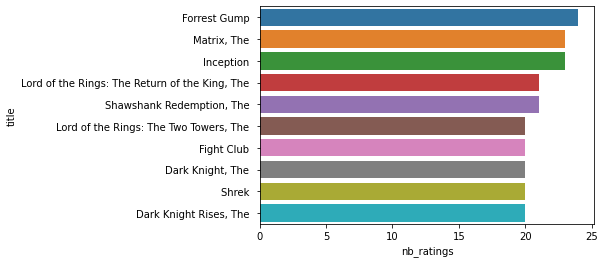

In [486]:
#Display the most popular movies
plot_barchart(top_popular(df=df, top=10, days_past=365), 'nb_ratings', 'title')

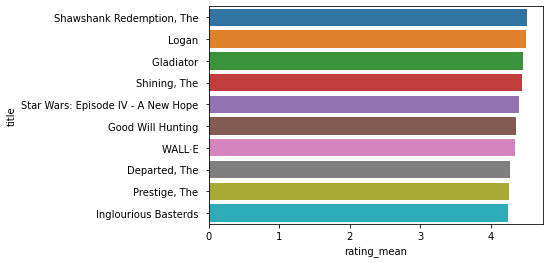

In [487]:
#Display the most rated movies
plot_barchart(top_rating(df=df, top=10, days_past=365), 'rating_mean', 'title')

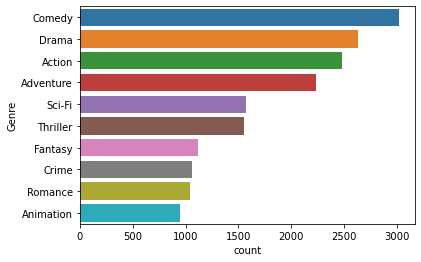

In [488]:
#Display the most popular category of movies
plot_barchart(top_genre(df, 10, 365), 'count', 'Genre')

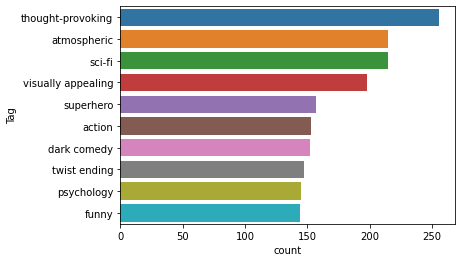

In [489]:
#Display the most popular tags of movies
plot_barchart(top_tags(df, 10, 365), 'count', 'Tag')

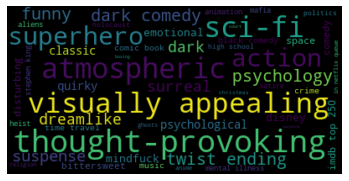

In [490]:
#Display the most popular tags of movies in a different way
plot_wordcloud(top_tags(df, 100, 365))

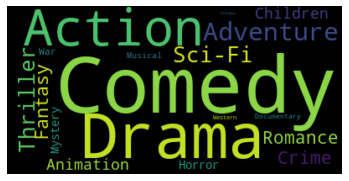

In [491]:
#Display the most popular tags of movies in a different way
plot_wordcloud(top_genre(df, 100, 365))

## MODEL TUNING

### Création d'un modèle Matrice Factorization - SVD

In [492]:
from surprise import Dataset, Reader, SVD, accuracy
from surprise.model_selection import train_test_split

In [493]:
# instantiate a reader and read in our rating data
reader = Reader(rating_scale=(1, 5))
data = Dataset.load_from_df(dfratings[['userId','movieId','rating']], reader)
 
# train SVD on 75% of known rates
trainset, testset = train_test_split(data, test_size=.25)
algorithm = SVD()
algorithm.fit(trainset)
predictions = algorithm.test(testset)
 
# check the accuracy using Root Mean Square Error
accuracy.rmse(predictions)


RMSE: 0.8778


0.8778484272344907

In [494]:
def add_titles(df):
    mask = dfmovies['movieId'].isin(df['movieId'])
    dftojoin = dfmovies.loc[mask][['title', 'movieId']]
    
    return pd.merge(dftojoin, df, on='movieId')

In [495]:
def predict_ratings_user(df, userid, top):
    user = userid
    #Extract the user's movies attributs
    user_movies = df.loc[df["userId"] == user]
    user_movies = user_movies.drop(['userId','rating','dates','title','year'], axis=1)
    
    #List of movies viewed by the user
    list_of_movies_view = user_movies["movieId"]
    
    predicted_ratings=[]
    uid = []
    for i in list_of_movies_view:
        predicted_ratings.append((i, algorithm.predict(user, i).est))
        
        
    # check the preferences of a particular user
    pdf = pd.DataFrame(predicted_ratings, columns = ['movieId','ratings'])
    
    pdf = add_titles(pdf).sort_values('ratings', ascending=False, inplace=False).head(top)
    

    #mask = dfmovies['movieId'].isin(pdf['movieId'])
    
    
    #dftojoin = dfmovies.loc[mask][['title', 'movieId']]

    return pdf

In [496]:
predict_ratings_user(df, 111, 10)

,title,movieId,ratings
14,Forrest Gump,356,4.384989
269,Harry Potter and the Goblet of Fire,40815,4.351937
200,Finding Nemo,6377,4.336899
320,Superbad,54503,4.303876
335,Forgetting Sarah Marshall,58998,4.272218
232,Harry Potter and the Prisoner of Azkaban,8368,4.233845
105,"Boondock Saints, The",3275,4.222224
486,"Wolf of Wall Street, The",106782,4.195060
92,Fight Club,2959,4.193454
405,Jackass 2.5,80139,4.153466


### Content-based recommandation models creation

In [497]:
df.columns

Index(['movieId', 'userId', 'rating', 'dates', 'title', 'year', 'Action',
       'Adventure', 'Animation', 'Children', 'Comedy', 'Crime', 'Documentary',
       'Drama', 'Fantasy', 'Film-Noir', 'Horror', 'Musical', 'Mystery',
       'Romance', 'Sci-Fi', 'Thriller', 'War', 'Western', 'in netflix queue',
       'atmospheric', 'superhero', 'thought-provoking', 'funny', 'surreal',
       'disney', 'sci-fi', 'quirky', 'religion', 'psychology', 'suspense',
       'dark comedy', 'visually appealing', 'twist ending', 'comedy',
       'politics', 'crime', 'music', 'high school', 'mental illness', 'dark',
       'action', 'time travel', 'aliens', 'mindfuck', 'space', 'black comedy',
       'dreamlike', 'journalism', 'holocaust', 'heist', 'shakespeare',
       'emotional', 'disturbing', 'mafia', 'stephen king', 'court', 'classic',
       'christmas', 'anime', 'satire', 'comic book', 'boxing', 'adultery',
       'adolescence', 'bittersweet', 'ghosts', 'animation', 'psychological',
       'imdb top 

List of movies with their attributes

In [498]:
def movies_genres(df):
    genre_df=df.drop_duplicates(['movieId','Action','Adventure','Animation','Children','Comedy','Crime','Documentary',\
                             'Drama','Fantasy','Film-Noir','Horror','Musical','Mystery','Romance','Sci-Fi','Thriller',\
                             'War','Western','in netflix queue','atmospheric', 'superhero', 'surreal', 'funny', \
                             'thought-provoking','disney', 'sci-fi', 'religion', 'quirky', 'dark comedy', 'suspense',\
                             'psychology', 'visually appealing', 'twist ending', 'politics','comedy', 'crime', 'music',\
                             'action', 'mental illness', 'time travel','high school', 'dark', 'aliens', 'mindfuck', 'space',\
                             'dreamlike', 'black comedy', 'mafia', 'disturbing', 'stephen king', 'heist', 'journalism', \
                             'emotional', 'holocaust', 'shakespeare', 'classic', 'anime', 'court', 'satire', 'christmas', \
                             'boxing', 'adultery', 'imdb top 250', 'comic book', 'ghosts', 'psychological', 'adolescence',\
                             'bittersweet', 'animation'])\
                        [['movieId','Action','Adventure','Animation','Children','Comedy','Crime','Documentary',\
                             'Drama','Fantasy','Film-Noir','Horror','Musical','Mystery','Romance','Sci-Fi','Thriller',\
                             'War','Western','in netflix queue','atmospheric', 'superhero', 'surreal', 'funny', \
                             'thought-provoking','disney', 'sci-fi', 'religion', 'quirky', 'dark comedy', 'suspense',\
                             'psychology', 'visually appealing', 'twist ending', 'politics','comedy', 'crime', 'music',\
                             'action', 'mental illness', 'time travel','high school', 'dark', 'aliens', 'mindfuck', 'space',\
                             'dreamlike', 'black comedy', 'mafia', 'disturbing', 'stephen king', 'heist', 'journalism', \
                             'emotional', 'holocaust', 'shakespeare', 'classic', 'anime', 'court', 'satire', 'christmas', \
                             'boxing', 'adultery', 'imdb top 250', 'comic book', 'ghosts', 'psychological', 'adolescence',\
                             'bittersweet', 'animation']].reset_index(drop = True)

    return genre_df

#### Model based on defined attributes

In [499]:
from scipy.spatial.distance import pdist, squareform

def jaccard_similarity_table(df):
    genre_df = movies_genres(df)
    #Calculating Jaccard similarity between movies with the distance of Jaccard in a list

    jaccard_distances = pdist(genre_df.values, metric='jaccard')
    
    #Finding the distance between all items in a matrix
    square_jaccard_distances = squareform(jaccard_distances)
    
    #The similarity is calculated from the distance. If the distance is small, the similarity is better.
    jaccard_similarity_array = 1 - square_jaccard_distances
    
    #Creating a usable similarity table
    similarity_df = pd.DataFrame(jaccard_similarity_array,
                           index=genre_df['movieId'],
                           columns=genre_df['movieId'])
    
    return similarity_df

Jaccard similarity matrix calcul

In [500]:
similarity_df = jaccard_similarity_table(df)

Function to obtain the similarity rate between 2 movies

In [501]:
def similarity_movies(movieId1, movieId2):
    return similarity_df[movieId1][movieId2]

Comparing movies (1 & 2)

In [502]:
print(similarity_movies(1,2))

0.5


Comparing close movies (95473 & 95475)

In [503]:
print(similarity_movies(95473,95475))

0.75


Function to obtain the list of most similar movies of 1 movie

In [504]:
def similar_movies(movieId, top):
    similarity = similarity_df[movieId].sort_values(ascending=False).reset_index()
    #similarity.rename(column={1:'similarity_score'}, inplace=True)
    similarity.columns = ['movieId', 'similarity_score']
    
        
    pdf = add_titles(similarity).sort_values('similarity_score', ascending=False, inplace=False).head(top)
    

    return pdf

Finding the most similar movies

In [505]:
similar_movies(1,5)

,title,movieId,similarity_score
0,Toy Story,1,1.000000
6931,"Tale of Despereaux, The",65577,0.833333
1705,Antz,2294,0.833333
6469,Shrek the Third,53121,0.833333
9412,Moana,166461,0.833333


#### Recommendations model based on user profil

Finding recommendations for a user according to movies already seen by him

In [506]:
from sklearn.metrics.pairwise import cosine_similarity

def user_profil_recommendation(df, user):
    #Extract the user's movies attributs
    user_movies = df.loc[df["userId"] == user]
    user_movies = user_movies.drop(['userId','rating','dates','title','year'], axis=1)
    
    #List of movies viewed by the user
    list_of_movies_view = user_movies["movieId"]
    #print(list_of_movies_view)
    
    #indexation on movieId
    user_movies.reset_index(drop = True)
    user_movies.set_index(["movieId"], inplace = True, append = True, drop = True)
    
    #Build the user profile based on mean of viewed movies attributs
    user_prof = user_movies.mean()
    user_prof.values.reshape(1,-1)

    #List of movies with their attributes
    genre_df = movies_genres(df)
    
    mask = ~genre_df['movieId'].isin(list_of_movies_view)
    
    # Create a subset of only the non read books
    #non_user_movies = genre_df.drop(list_of_movies_view, axis=0)
    non_user_movies = genre_df.loc[mask]
    
    #indexation on movieId
    non_user_movies.reset_index(drop = True)
    non_user_movies.set_index(["movieId"], inplace = True, append = True, drop = True)
    
    # Calculate the cosine similarity between all rows
    user_prof_similarities = cosine_similarity(user_prof.values.reshape(1, -1), non_user_movies)
    
    # Wrap in a DataFrame for ease of use
    user_prof_similarities_df = pd.DataFrame(user_prof_similarities.T, index=non_user_movies.index, columns=["similarity_score"])
    
    #sort by similarity score descending
    sorted_similarity_df = user_prof_similarities_df.sort_values(by="similarity_score", ascending=False).reset_index()
    sorted_similarity_df = sorted_similarity_df.drop('level_0', axis=1)
    
    return(sorted_similarity_df, list_of_movies_view)

In [507]:
def recommender(df, user_id, top):
    #recover movie recommendations for a user from his profil
    dfrecommended, list_of_movies_view =(user_profil_recommendation(df, user_id))
    
            
    pdf = add_titles(dfrecommended).sort_values('similarity_score', ascending=False, inplace=False).head(top)
    
    return pdf

Top 5 of movies recommended to user 1 according to movies already seen

In [508]:
recommender(df,1,5)

,title,movieId,similarity_score
8347,Dragonheart 2: A New Beginning,117646,0.859646
6321,"Hunting Party, The",55116,0.838284
3372,"Stunt Man, The",4956,0.817467
3768,Flashback,5657,0.816282
4441,The Great Train Robbery,6990,0.816282


### Creation Collaborative filtering model

#### Input data preparation

In [509]:
pip install fuzzywuzzy

Note: you may need to restart the kernel to use updated packages.


In [510]:
import os
import time
import gc
from sklearn.neighbors import NearestNeighbors
from scipy.sparse import csr_matrix

# utils import
from fuzzywuzzy import fuzz
def prep_data(df_ratings,df_movies):
        """
        prepare data for recommender
        1. movie-user scipy sparse matrix
        2. hashmap of movie to row index in movie-user scipy sparse matrix
        """
        # filter data
        df_movies_cnt = pd.DataFrame(df_ratings.groupby('movieId').size(),columns=['count'])
        popular_movies = list(set(df_movies_cnt.query('count >= 10').index))  # noqa
        movies_filter = df_ratings.movieId.isin(popular_movies).values

        df_users_cnt = pd.DataFrame(df_ratings.groupby('userId').size(),columns=['count'])
        active_users = list(set(df_users_cnt.query('count >= 10').index))  # noqa
        users_filter = df_ratings.userId.isin(active_users).values

        df_ratings_filtered = df_ratings[movies_filter & users_filter]

        # pivot and create movie-user matrix
        movie_user_mat = df_ratings_filtered.pivot(
            index='movieId', columns='userId', values='rating').fillna(0)
        # create mapper from movie title to index
        hashmap = {
            movie: i for i, movie in
            enumerate(list(df_movies.set_index('movieId').loc[movie_user_mat.index].title)) # noqa
        }
        # transform matrix to scipy sparse matrix
        movie_user_mat_sparse = csr_matrix(movie_user_mat.values)
        # clean up
        del df_movies, df_movies_cnt, df_users_cnt
        del df_ratings, df_ratings_filtered, movie_user_mat
        gc.collect()
        return movie_user_mat_sparse, hashmap


In [511]:
def fuzzy_matching(hashmap, fav_movie):
        """
        return the closest match via fuzzy ratio.
        If no match found, return None
        Parameters
        ----------
        hashmap: dict, map movie title name to index of the movie in data
        fav_movie: str, name of user input movie
        Return
        ------
        index of the closest match
        """
        match_tuple = []
        # get match
        for title, idx in hashmap.items():
            ratio = fuzz.ratio(title.lower(), fav_movie.lower())
            if ratio >= 60:
                match_tuple.append((title, idx, ratio))
        # sort
        match_tuple = sorted(match_tuple, key=lambda x: x[2])[::-1]
        if not match_tuple:
            print('Oops! No match is found')
        else:
            print('Found possible matches in our database: '
                  '{0}\n'.format([x[0] for x in match_tuple]))
            return match_tuple[0][1]

#### Make films recommendations NearestNeighbors

In [512]:
from sklearn.neighbors import NearestNeighbors
model = NearestNeighbors(metric='cosine', algorithm='brute', n_neighbors=20, n_jobs=-1)

In [513]:
def inference(model, data, hashmap,fav_movie, n_recommendations):
        """
        return top n similar movie recommendations based on user's input movie
        Parameters
        ----------
        model: sklearn model, knn model
        data: movie-user matrix
        hashmap: dict, map movie title name to index of the movie in data
        fav_movie: str, name of user input movie
        n_recommendations: int, top n recommendations
        Return
        ------
        list of top n similar movie recommendations
        """
        # fit
        model.fit(data)
        # get input movie index
        print('You have input movie:', fav_movie)
        idx = fuzzy_matching(hashmap, fav_movie)
        # inference
        print('Recommendation system start to make inference')
        print('......\n')
        t0 = time.time()
        distances, indices = model.kneighbors(data[idx],n_neighbors=n_recommendations+1)
        # get list of raw idx of recommendations
        raw_recommends = \
            sorted(
                list(
                    zip(
                        indices.squeeze().tolist(),
                        distances.squeeze().tolist()
                    )
                ),
                key=lambda x: x[1]
            )[:0:-1]
        print('It took my system {:.2f}s to make inference \n\
              '.format(time.time() - t0))
        # return recommendation (movieId, distance)
        return raw_recommends

In [514]:
def make_recommendations(fav_movie, n_recommendations):
        """
        make top n movie recommendations
        Parameters
        ----------
        fav_movie: str, name of user input movie
        n_recommendations: int, top n recommendations
        """
        # get data
        movie_user_mat_sparse, hashmap = prep_data(dfratings,df_movies_initial)
        # get recommendations
        raw_recommends = inference(model, movie_user_mat_sparse, hashmap,fav_movie, n_recommendations)
        # print results
        raw_recommends = sorted(raw_recommends, key=lambda raw_recommends: raw_recommends[1]) 
        reverse_hashmap = {v: k for k, v in hashmap.items()}
        print('Top recommendations for {}:'.format(fav_movie))
        for i, (idx, dist) in enumerate(raw_recommends):
            print('{0}: {1}, with distance of {2}'.format(i+1, reverse_hashmap[idx], dist))

In [515]:
make_recommendations('iron man', 10)

You have input movie: iron man
Found possible matches in our database: ['Iron Man (2008)', 'Iron Man 3 (2013)', 'Iron Man 2 (2010)']

Recommendation system start to make inference
......

It took my system 0.02s to make inference 
              
Top recommendations for iron man:
1: Dark Knight, The (2008), with distance of 0.32946219051576764
2: WALL·E (2008), with distance of 0.3322251199632066
3: Avengers, The (2012), with distance of 0.3413244923996469
4: Iron Man 2 (2010), with distance of 0.35801447096159067
5: Avatar (2009), with distance of 0.3757322316601438
6: Batman Begins (2005), with distance of 0.4029287417301053
7: Up (2009), with distance of 0.40326434789507326
8: Thor (2011), with distance of 0.4105084379024724
9: Guardians of the Galaxy (2014), with distance of 0.4110291189201821
10: Star Trek (2009), with distance of 0.4175134166051351


## Let's also get statistics for a given client

In [516]:
#list of movies seen by the user
user = 111
mask = df.userId == user
df111 = df.loc[mask]
df111.head()

,movieId,userId,rating,dates,title,year,Action,Adventure,Animation,Children,...,satire,comic book,boxing,adultery,adolescence,bittersweet,ghosts,animation,psychological,imdb top 250
394,5,111,3.5,2018-02-01 00:28:39,Father of the Bride Part II,1995,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
886,16,111,4.5,2018-02-14 21:39:28,Casino,1995,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1289,24,111,2.5,2018-02-14 21:40:54,Powder,1995,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1701,34,111,2.5,2018-01-17 02:50:18,Babe,1995,0,0,0,1,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1899,39,111,4.0,2018-01-17 02:44:34,Clueless,1995,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


Last five ten movies seen by the person:

In [517]:
def last_movies_seen(df, top):
    list_seen = df.sort_values(by='dates', ascending=False).head(top)[['movieId','title']]
    
    return list_seen.reset_index(drop = True)

In [518]:
last_5_movies_seen_111 = last_movies_seen(df111, 5)
last_5_movies_seen_111

,movieId,title
0,6365,"Matrix Reloaded, The"
1,4011,Snatch
2,54995,Planet Terror
3,55276,Michael Clayton
4,53519,Death Proof


In [519]:
top_popular(df111, 5, 10000)

,movieId,title,nb_ratings
0,5,Father of the Bride Part II,1
404,79702,Scott Pilgrim vs. the World,1
426,86833,Bridesmaids,1
427,86880,Pirates of the Caribbean: On Stranger Tides,1
428,86911,"Hangover Part II, The",1


In [520]:
aux = top_rating(df111, 5, 10000)
aux

,movieId,title,rating_mean,rating_count
405,80139,Jackass 2.5,5.0,1
382,72167,"Boondock Saints II: All Saints Day, The",5.0,1
589,162344,Tom Segura: Mostly Stories,5.0,1
397,78209,Get Him to the Greek,5.0,1
401,79134,Grown Ups,5.0,1


In [521]:
top_genre(df111, 10, 10000)

,Genre,count
0,Comedy,463
1,Drama,138
2,Action,133
3,Romance,118
4,Adventure,112
5,Thriller,100
6,Crime,85
7,Fantasy,73
8,Children,65
9,Animation,61


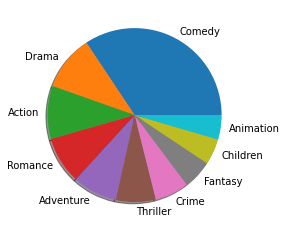

In [522]:
dataaa=top_genre(df111, 10, 10000)
y = dataaa['count'].values
mylabels = dataaa['Genre'].values

plt.pie(y, labels = mylabels, shadow = True)
plt.show()

In [523]:
#Test
top_tags(df, 10, 10000)

,Tag,count
0,sci-fi,2690.0
1,atmospheric,2534.0
2,thought-provoking,2487.0
3,twist ending,2440.0
4,dark comedy,2056.0
5,suspense,1940.0
6,superhero,1787.0
7,psychology,1750.0
8,disney,1748.0
9,time travel,1730.0


Let's try to get the poster of his favourites movies, there is a database connecting movie id with the poster

In [524]:
dfposter = pd.read_csv('movie_poster.csv', names=['movieId', 'url'])
dfposter.head()

FileNotFoundError: [Errno 2] No such file or directory: 'movie_poster.csv'

In [ ]:
mask = dfposter['movieId'].isin([1])
dfposter.loc[mask].url.values[0]

In [ ]:
from IPython.display import Image
from IPython.core.display import HTML 
Image(url= dfposter.loc[mask].url.values[0])

In [ ]:
#Top of movies recommended to a user according to movies already seen
sorted_similarity_movies = recommender(df,user,5)
print(sorted_similarity_movies)

In [ ]:
#Recommendation in function of the last movie view of user
print(similar_movies(last_5_movies_seen_111.movieId[0],10))

## Top 10 recommended films for the user using the Collaborative filtering model

In [529]:
#function return the favorite film of a user
def fav_film(df,userId):
    df_user = df[df['userId']==userId].sort_values(by=['rating'],ascending=False).reset_index() 
    df_user.drop('index',axis =1,inplace=True) 
    for i in range(100) :
        fav_movie_Id = df_user['movieId'][i]
        fav_movie_title = df_user['title'][i]  
        if (df[df['movieId']==fav_movie_Id].shape[0]>=10) :
            return  fav_movie_title

In [530]:
fav_film(df,111)

'Get Him to the Greek '

In [531]:
make_recommendations(fav_film(df,111) , 10)

You have input movie: Get Him to the Greek 
Found possible matches in our database: ['Get Him to the Greek (2010)']

Recommendation system start to make inference
......

It took my system 0.02s to make inference 
              
Top recommendations for Get Him to the Greek :
1: Due Date (2010), with distance of 0.419862208102338
2: This Is the End (2013), with distance of 0.4599671176505161
3: Super Troopers (2001), with distance of 0.4840707421005104
4: Role Models (2008), with distance of 0.486906160005524
5: Click (2006), with distance of 0.5213340099618746
6: Spy (2015), with distance of 0.5254695536143745
7: American Hustle (2013), with distance of 0.5317873185219577
8: Nightcrawler (2014), with distance of 0.5320851181211347
9: Horrible Bosses (2011), with distance of 0.5323110846549173
10: 21 Jump Street (2012), with distance of 0.5350358189274994


## Top 10 recommended films for the user using the Matrix_Factorization model

In [532]:
predict_ratings_user(df, 111, 10)

,title,movieId,ratings
14,Forrest Gump,356,4.384989
269,Harry Potter and the Goblet of Fire,40815,4.351937
200,Finding Nemo,6377,4.336899
320,Superbad,54503,4.303876
335,Forgetting Sarah Marshall,58998,4.272218
232,Harry Potter and the Prisoner of Azkaban,8368,4.233845
105,"Boondock Saints, The",3275,4.222224
486,"Wolf of Wall Street, The",106782,4.195060
92,Fight Club,2959,4.193454
405,Jackass 2.5,80139,4.153466
